# Customer Segmentation on RFM Analysis

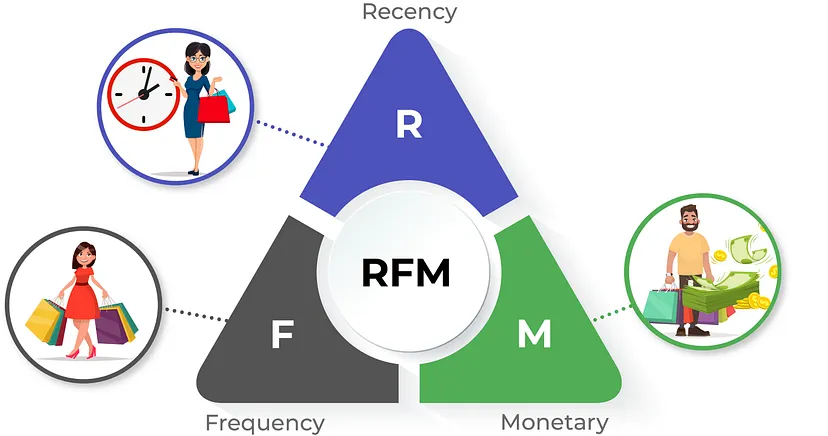

## RFM Analysis Overview

RFM Analysis is a concept used by Data Science professionals, especially in the marketing domain for understanding and segmenting customers based on their buying behaviour.

Using RFM Analysis, a business can assess customers’:

* <B>Recency</b> (the date they made their last purchase)
* <B>Frequency</b> (how often they make purchases)
* <B>Monetary</b> (the amount spent on purchases)

Recency, Frequency, and Monetary value of a customer are three key metrics that provide information about customer engagement, loyalty, and value to a business.

## Problem Statement

This project is constructed to segment customers based on their buying patters. 
1. Conduct RFM Analysis to divide customers on differnt groups.
2. Produce K-means clustering unsupervised machine learning model to form clusters of customer with similar recency, frequency, monetary
3. Observe each clusters and then make conclusion

* <b>The project flow will be</b>
* <b>Importing Libraries</b>
* <b>Loading Data into Python</b>
* <b>Data Description</b>
* <b>Basic Data Exploration</b>
* <b>Exploratory Data Analysis</b>
* <b>RFM Analysis</b>
* <b>Customer Segmentation on RFM Score</b>
* <b>K Means Clustering for Recency, Frequency, Monetary</b>
* <b>Interpretation of Clustering</b>
* <b>Recommendation</b>
* <b>Conclusion</b>











## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
pio.renderers.default = 'notebook'
import plotly.offline as pyo 
pyo.init_notebook_mode(connected=True)

import datetime as dt

import feature_engine
from feature_engine.outliers import Winsorizer

import warnings
warnings.filterwarnings("ignore")


## Loading Data into Python

In [2]:
# Storing Data into DataFrame
retail = pd.read_csv('C:\\Users\\ADMIN\\OneDrive\\Desktop\\Final Project RFM\\Online_Retail.csv', encoding= 'unicode_escape')

# Looking at sample rows in the data
retail.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


## Data Description

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The
company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

* <b>InvoiceNo</b>: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* <b>StockCode</b>: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* <b>Description</b>: Product (item) name. Nominal.
* <b>Quantity</b>: The quantities of each product (item) per transaction. Numeric.
* <b>InvoiceDate</b>: Invice Date and time. Numeric, the day and time when each transaction was generated.
* <b>UnitPrice</b>: Unit price. Numeric, Product price per unit in sterling.
* <b>CustomerID</b>: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* <b>Country</b>: Country name. Nominal, the name of the country where each customer resides.

## Basic Data Exploration

In [3]:
# Getting the information about datatypes & non-null values
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# Printing shape of data
print(retail.shape)

(541909, 8)


In [5]:
# Checking for null values
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Dropping all null values 
retail=retail.dropna()

In [7]:
# Printing shape of Data after dropping null values
print(retail.shape)

(406829, 8)


In [8]:
# Checking the data where Quantity is negative
retail.loc[(retail['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


In [9]:
# Removing the data where Quantity is negative
retail=retail[retail['Quantity']>0]

In [10]:
# Printing the shape of data after removing data
print(retail.shape)

(397924, 8)


In [11]:
# Converting "CustomerID" from Float to int to String
retail['CustomerID'] = retail['CustomerID'].values.astype(int)
retail['CustomerID'] = retail['CustomerID'].values.astype(str)

In [12]:
# Converting Date column to DateTime type
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format='%m/%d/%y %H:%M')
retail['Date'] = retail['InvoiceDate'].dt.strftime('%Y-%m')

In [13]:
# Adding Revenue Column as Quantity*UnitPrice
retail['Revenue'] = retail['Quantity']*retail['UnitPrice']

In [14]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34


## Exploratory Data Analysis

In [15]:
# Looking at the descriptive statistics of the data
retail.describe()

,Quantity,UnitPrice,Revenue
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,22.394749
std,180.420210,22.096788,309.055588
min,1.000000,0.000000,0.000000
25%,2.000000,1.250000,4.680000
50%,6.000000,1.950000,11.800000
75%,12.000000,3.750000,19.800000
max,80995.000000,8142.750000,168469.600000


In [16]:
# Checking the distribution of Country
print(retail['Country'].value_counts(normalize=True)*100 )

United Kingdom          89.048411
Germany                  2.272293
France                   2.096380
EIRE                     1.818940
Spain                    0.624491
Netherlands              0.593832
Belgium                  0.510399
Switzerland              0.462902
Portugal                 0.367407
Australia                0.297796
Norway                   0.269398
Italy                    0.190489
Channel Islands          0.187976
Finland                  0.172143
Cyprus                   0.154301
Sweden                   0.113338
Austria                  0.100019
Denmark                  0.095496
Poland                   0.082930
Japan                    0.080669
Israel                   0.062323
Unspecified              0.061318
Singapore                0.055790
Iceland                  0.045737
USA                      0.044983
Canada                   0.037947
Greece                   0.036439
Malta                    0.028146
United Arab Emirates     0.017089
European Commu

In [17]:
# Month-Year wise order
df_order= retail.groupby(['Date'])['Quantity'].sum().reset_index()
df_order

,Date,Quantity
0,2010-12,312280
1,2011-01,349147
2,2011-02,265638
3,2011-03,348544
4,2011-04,292225
5,2011-05,373685
6,2011-06,363699
7,2011-07,369432
8,2011-08,398938
9,2011-09,544899


In [18]:
# Month-year wise Revenue
df_rev= retail.groupby(['Date'])['Revenue'].sum().reset_index()
df_rev

,Date,Revenue
0,2010-12,572713.890
1,2011-01,569445.040
2,2011-02,447137.350
3,2011-03,595500.760
4,2011-04,469200.361
5,2011-05,678594.560
6,2011-06,661213.690
7,2011-07,600091.011
8,2011-08,645343.900
9,2011-09,952838.382


In [19]:
#Function to plot
def plot_df(df, x, y, title="", xlabel ="", ylabel ="", dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()


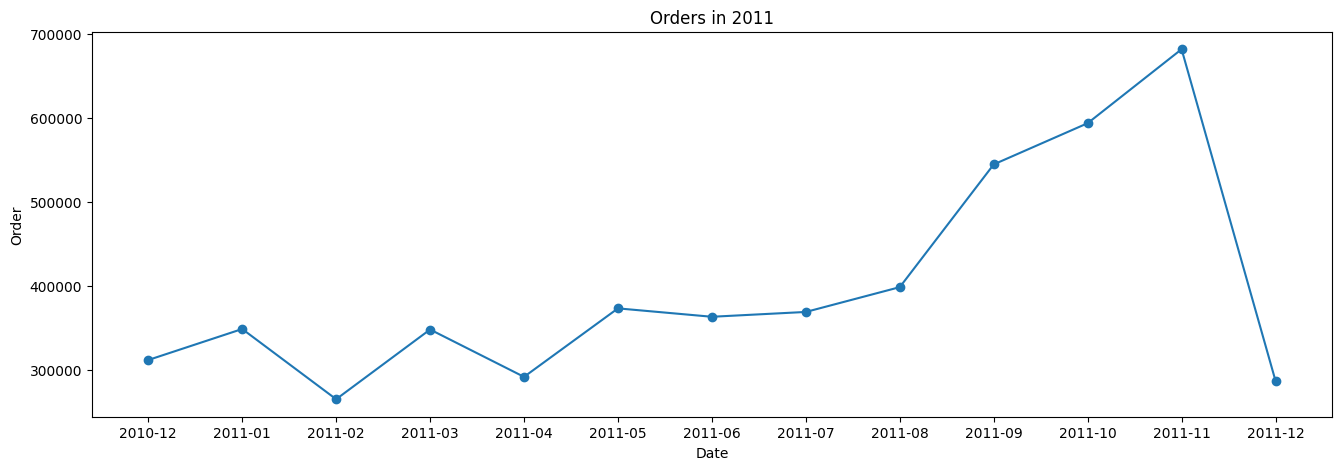

In [20]:
#plotting Order over Month-Year
plot_df(df_order, x=df_order.Date, y=df_order.Quantity,title='Orders in 2011',xlabel="Date", ylabel="Order")

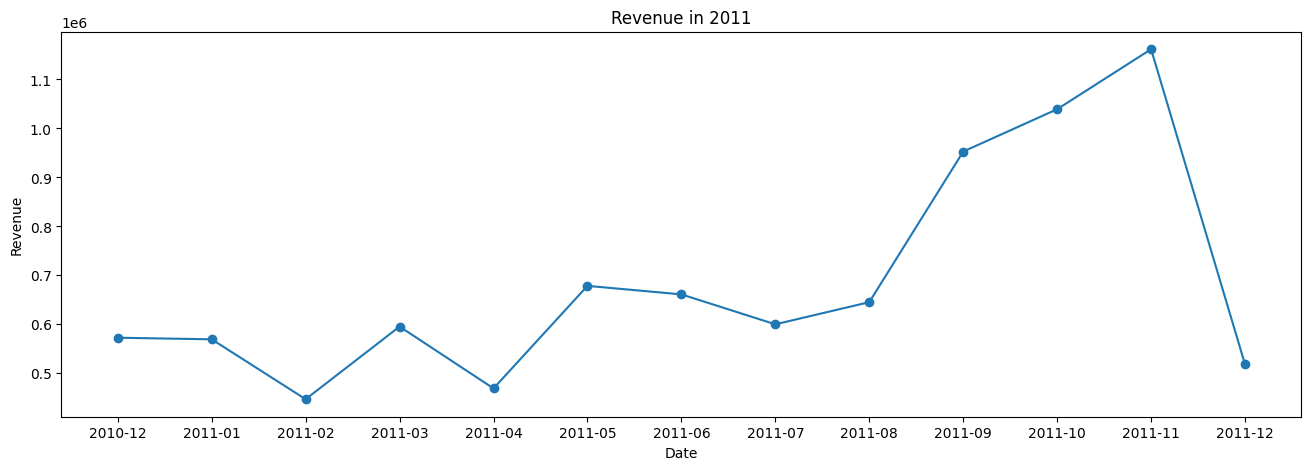

In [21]:
#plotting Revenue over Month-Year
plot_df(df_rev, x=df_rev.Date, y=df_rev.Revenue,title='Revenue in 2011',xlabel="Date", ylabel="Revenue")

In [22]:
# Top 5 country in Orders and Revenue
retail.groupby(['Country']).agg({
    'Quantity': 'sum',
    'Revenue': 'sum'}).sort_values('Revenue', ascending = False).head(5)

,Quantity,Revenue
Country,,
United Kingdom,4269472,7308391.554
Netherlands,200937,285446.340
EIRE,140525,265545.900
Germany,119263,228867.140
France,111472,209024.050


### Exploratory Data Analysis Result
* 89% of customer are from United Kingdom.
* A certain downward trend occured in November 2011 for both Order and Tevenue.
* Apart from UK, Netherland is generarting better revenue with less customer compare to other country with more customer


## RFM Analysis

### Recency

In [23]:
# Compute the maximum date to know the last transaction date
max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [24]:
# Calcuting Days between last invoice date and recent purchase date
retail['Daydiff']=max_date - retail['InvoiceDate']

In [25]:
# Calculate Recency of each Customer
retail_r = retail.groupby(['CustomerID'])['Daydiff'].min().dt.days
retail_r = retail_r.reset_index()
retail_r.rename(columns={'Daydiff': 'Recency'}, inplace=True)
retail_r.head()


,CustomerID,Recency
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309


### Frequency

In [26]:
# Calculate Frequency of Each Customer
retail_f = retail.groupby('CustomerID')['InvoiceNo'].count().reset_index()
retail_f.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
retail_f.head()


,CustomerID,Frequency
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17


### Monetary

In [27]:
# Calculate Monetary of Each Customer
retail_m=retail.groupby(['CustomerID'])['Revenue'].sum().reset_index()
retail_m.rename(columns={'Revenue': 'Monetary'}, inplace=True)
retail_m.head()

,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


### RFM Matrix

In [28]:
# Creating Frequency-Monetary Matrix
retail_fm = retail_f.merge(retail_m, left_on = 'CustomerID', right_on = 'CustomerID', how = 'inner')
retail_fm.head()

,CustomerID,Frequency,Monetary
0,12346,1,77183.60
1,12347,182,4310.00
2,12348,31,1797.24
3,12349,73,1757.55
4,12350,17,334.40


In [29]:
# Creating Recency-Frequency-Monetary Matrix
retail_rfm = retail_r.merge(retail_fm, left_on = 'CustomerID', right_on = 'CustomerID', how = 'inner')
retail_rfm.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12347,1,182,4310.00
2,12348,74,31,1797.24
3,12349,18,73,1757.55
4,12350,309,17,334.40
5,12352,35,85,2506.04
6,12353,203,4,89.00
7,12354,231,58,1079.40
8,12355,213,13,459.40
9,12356,22,59,2811.43


### RFM Score Calculation

In [30]:
# Dividing RFM Datafram into 4 parts using quantile
retail_rfm['CustomerID'] = retail_rfm['CustomerID'].values.astype(int)
quantiles = retail_rfm.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [31]:
segmented_rfm = retail_rfm.copy()

In [32]:
# Function to calculate Recency_score
def RScore(x,p,d):
    if x<= d[p][0.25]:
        return 1
    elif x<= d[p][0.50]:
        return 2
    elif x<= d[p][0.75]:
        return 3
    else:
        return 4

# Function to calculate Frequency and Monetary
def FMScore(x,p,d):
    if x<= d[p][0.25]:
        return 4
    elif x<= d[p][0.50]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else:
        return 1



In [33]:
# Assign Score for Recency, Frequency, Monetary
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,12346,325,1,77183.60,4,4,1
1,12347,1,182,4310.00,1,1,1
2,12348,74,31,1797.24,3,3,1
3,12349,18,73,1757.55,2,2,1
4,12350,309,17,334.40,4,4,3


In [34]:
# Calculate RFM Score 
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
segmented_rfm['Value Segment'] = pd.qcut(segmented_rfm['RFM_Score'], q=3, labels=segment_labels)
segmented_rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,Value Segment
0,12346,325,1,77183.60,4,4,1,441,9,Mid-Value
1,12347,1,182,4310.00,1,1,1,111,3,Low-Value
2,12348,74,31,1797.24,3,3,1,331,7,Mid-Value
3,12349,18,73,1757.55,2,2,1,221,5,Low-Value
4,12350,309,17,334.40,4,4,3,443,11,High-Value


## Customer Segmentation on RFM Score

In [35]:
# Create a new column for RFM Customer Segments
segmented_rfm['RFM Customer Segments'] = 'Average Customer'

#Assign RFM Segment Best on scenario
segmented_rfm.loc[(segmented_rfm['R_quartile'] == 1) & (segmented_rfm['F_quartile'] == 1) & (segmented_rfm['M_quartile'] == 1), 'RFM Customer Segments'] = 'Best Customer'
segmented_rfm.loc[(segmented_rfm['F_quartile'] == 1) & (segmented_rfm['R_quartile'] > 1) & (segmented_rfm['M_quartile'] > 1) , 'RFM Customer Segments'] = 'Loyal Customer'
segmented_rfm.loc[(segmented_rfm['M_quartile'] == 1) & (segmented_rfm['R_quartile'] > 1) & (segmented_rfm['F_quartile'] > 1), 'RFM Customer Segments'] = 'Big Spender'
segmented_rfm.loc[(segmented_rfm['R_quartile'] == 1) & (segmented_rfm['F_quartile'] == 2 ) & (segmented_rfm['M_quartile'] == 2 ), 'RFM Customer Segments'] = 'Potential Best Customer'
segmented_rfm.loc[(segmented_rfm['R_quartile'] <= 2) & (segmented_rfm['F_quartile'] > 2 ), 'RFM Customer Segments'] = 'Look out Buyers'
segmented_rfm.loc[(segmented_rfm['R_quartile'] == 2) & (segmented_rfm['F_quartile'] == 3 ) , 'RFM Customer Segments'] = 'Occational Buyers'
segmented_rfm.loc[(segmented_rfm['R_quartile'] == 3) & (segmented_rfm['F_quartile'] == 4 ), 'RFM Customer Segments'] = 'Almost Lost Customer'
segmented_rfm.loc[(segmented_rfm['R_quartile'] == 4) & (segmented_rfm['F_quartile'] == 4 ), 'RFM Customer Segments'] = 'Lost Customer'
segmented_rfm.loc[segmented_rfm['RFM_Segment'] == '444', 'RFM Customer Segments'] = 'Lost Cheap Customer'

# Print the updated data with RFM segments
print(segmented_rfm)




      CustomerID  Recency  Frequency  Monetary  R_quartile  F_quartile  \
0          12346      325          1  77183.60           4           4   
1          12347        1        182   4310.00           1           1   
2          12348       74         31   1797.24           3           3   
3          12349       18         73   1757.55           2           2   
4          12350      309         17    334.40           4           4   
...          ...      ...        ...       ...         ...         ...   
4334       18280      277         10    180.60           4           4   
4335       18281      180          7     80.82           4           4   
4336       18282        7         12    178.05           1           4   
4337       18283        3        756   2094.88           1           1   
4338       18287       42         70   1837.28           2           2   

      M_quartile RFM_Segment  RFM_Score Value Segment RFM Customer Segments  
0              1         441     

In [36]:
# Checking the distribution of Customer segments
segmented_rfm['RFM Customer Segments'].value_counts()

Average Customer           1896
Look out Buyers             456
Best Customer               447
Lost Cheap Customer         384
Almost Lost Customer        296
Occational Buyers           240
Loyal Customer              187
Potential Best Customer     150
Big Spender                 144
Lost Customer               139
Name: RFM Customer Segments, dtype: int64

In [37]:
# RFM Segment Distribution
segment_counts = segmented_rfm['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']


# Create the bar chart
fig_segment_dist = px.bar(segment_counts, x='Value Segment', y='Count', 
                          color='Value Segment', color_discrete_sequence=['steelblue','lightskyblue','lightsteelblue'],
                          title='RFM Value Segment Distribution', width = 1300, height = 600)

# Update the layout
fig_segment_dist.update_layout(xaxis_title='RFM Value Segment',
                              yaxis_title='Count',
                              showlegend=False)

# Show the figure
fig_segment_dist.show()

In [38]:
# Plotting Treemap to check Customer Segmentation distributon in each RFM Value segment
segment_product_counts = segmented_rfm.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')

segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

fig_treemap_segment_product = px.treemap(segment_product_counts, 
                                         path=['Value Segment', 'RFM Customer Segments'], 
                                         values='Count',
                                         color='Value Segment', color_discrete_sequence=['lightsteelblue','lightskyblue','steelblue'],
                                         title='RFM Customer Segments by Value', width = 1300, height = 900)
fig_treemap_segment_product.show()

In [39]:
# Calculate the average Recency, Frequency, and Monetary scores for each segment
segment_scores = segmented_rfm.groupby('RFM Customer Segments')[['R_quartile', 'F_quartile', 'M_quartile']].mean().reset_index()

# Create a grouped bar chart to compare segment scores
fig = go.Figure()

# Add bars for Recency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['R_quartile'],
    name='Recency Score',
    marker_color='rgb(158,202,225)'
))

# Add bars for Frequency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['F_quartile'],
    name='Frequency Score',
    marker_color='rgb(94,158,217)'
))

# Add bars for Monetary score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['M_quartile'],
    name='Monetary Score',
    marker_color='rgb(32,102,148)'
))

# Update the layout
fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    width = 1200,
    height = 600,
    showlegend=True
)

fig.show()

In [40]:
# Average Value of Recency, Frequency, Monetary for each RFM Score
segmented_rfm.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean' }).round(1)

,Recency,Frequency,Monetary
RFM_Score,,,
3,6.3,374.5,9319.2
4,20.1,187.7,4083.2
5,31.1,112.3,2049.4
6,45.0,80.0,1801.4
7,63.6,56.8,994.1
8,78.1,38.5,755.5
9,95.3,27.9,824.0
10,153.3,21.4,368.5
11,174.7,13.6,239.6


## K Means Clustering for Recency, Frequency, Monetary

### Checking Skewness

In [41]:
## Function to check skewness
def skewness_check(df, column):
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

Recency's: Skew: 1.2459259732239887, : SkewtestResult(statistic=26.614420985448668, pvalue=4.6224317516580606e-156)
Frequency's: Skew: 18.09998294164316, : SkewtestResult(statistic=83.57008377610094, pvalue=0.0)
Monetary's: Skew: 19.32030329073974, : SkewtestResult(statistic=85.00748886946815, pvalue=0.0)


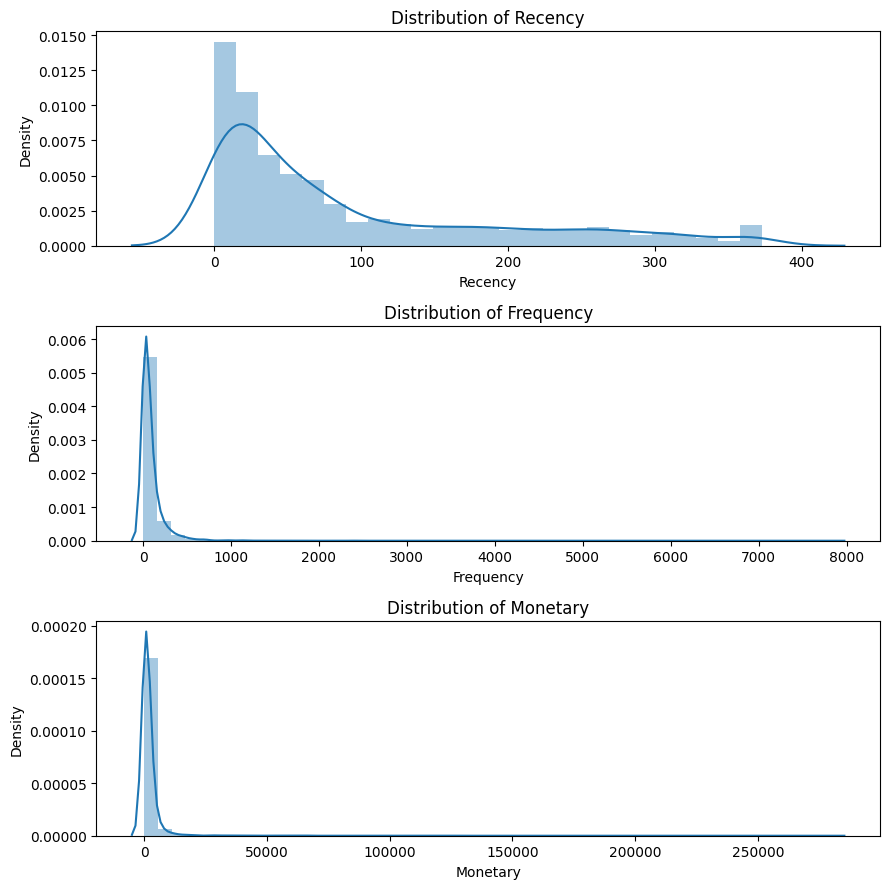

In [42]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
skewness_check(retail_rfm,'Recency')

plt.subplot(3, 1, 2)
skewness_check(retail_rfm,'Frequency')

plt.subplot(3, 1, 3)
skewness_check(retail_rfm,'Monetary')

plt.tight_layout()

The distribution of Recency, Frequency, Moretary are highly skewed, so we need to perform log transformation to reduce skewness

In [43]:
# Copy dataframe for log transformation
df_rfm_log = retail_rfm[['Recency','Frequency','Monetary']]

Recency's: Skew: -0.5538874647382168, : SkewtestResult(statistic=-13.967748465503988, pvalue=2.4525826166082397e-44)
Frequency's: Skew: -0.015266311768955052, : SkewtestResult(statistic=-0.41122081861075693, pvalue=0.680910624097231)
Monetary's: Skew: 0.36043773883598806, : SkewtestResult(statistic=9.420340481028644, pvalue=4.496276244632004e-21)


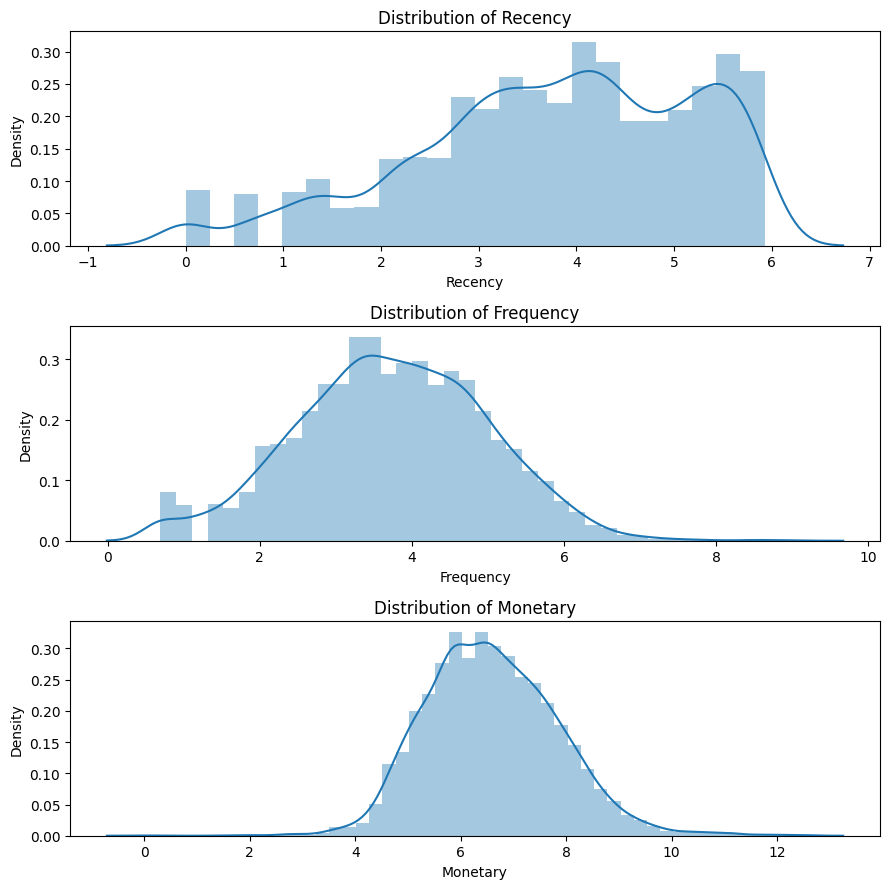

In [44]:
# Log Transformation
df_rfm_log = np.log(df_rfm_log+1)

# Checking skewness after log transformation
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
skewness_check(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
skewness_check(df_rfm_log,'Frequency')
plt.subplot(3, 1, 3)
skewness_check(df_rfm_log,'Monetary')

plt.tight_layout()

### Checking for Outliers

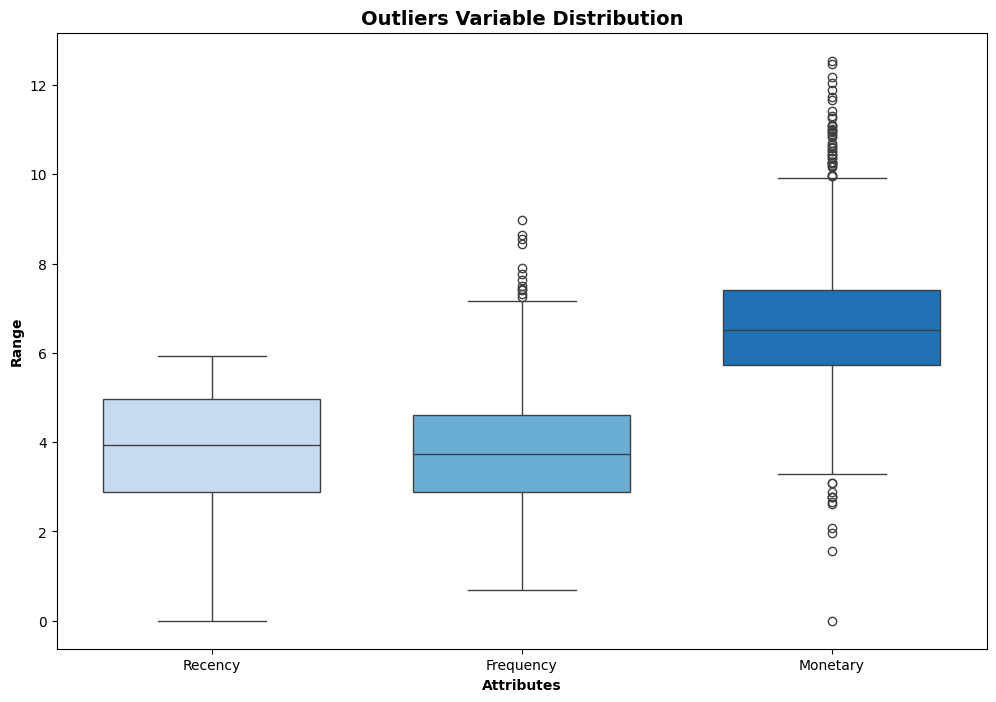

In [45]:
# Outlier Analysis of Recency, Frequency, Monetary
attributes = ['Recency','Frequency','Monetary']
plt.rcParams['figure.figsize'] = [12,8]
sns.boxplot(data = df_rfm_log[attributes], orient="v", palette='Blues' ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.show()

In [46]:
# Treating outliers by Windsorization
windsoriser = Winsorizer(tail='both',
                          fold=2,
                           variables=['Frequency', 'Monetary']
                        )
windsoriser.fit(df_rfm_log)

Winsorizer(fold=2, tail='both', variables=['Frequency', 'Monetary'])

In [47]:
# Capping outliers by Windsorization
df_rfm_log = windsoriser.transform(df_rfm_log)


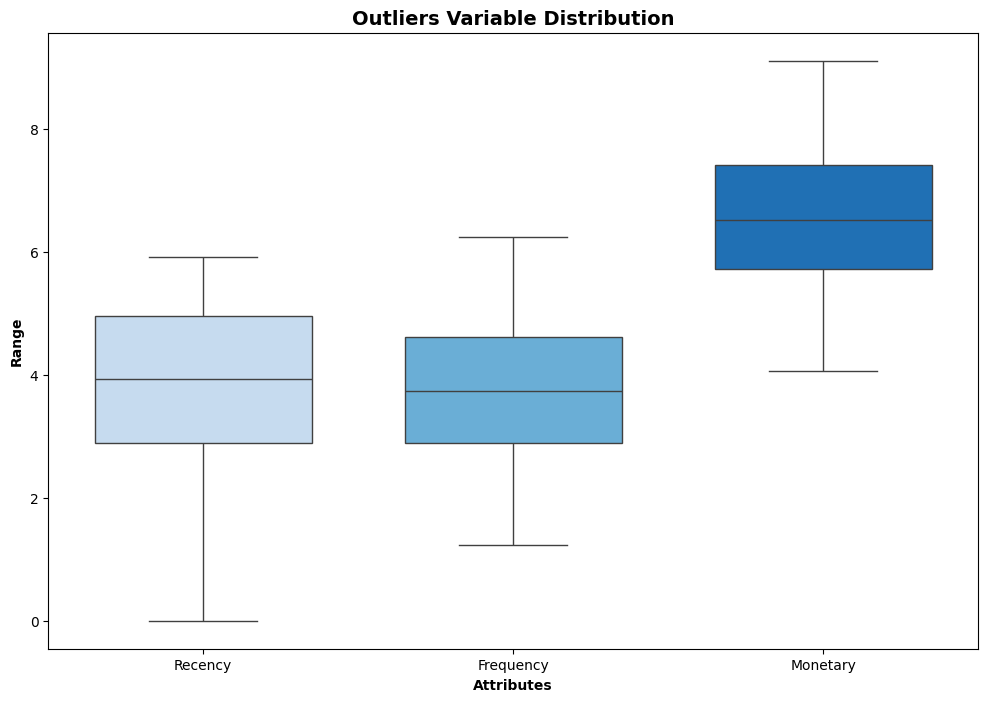

In [48]:
# Outlier Analysis of Recency, Frequency, Monetary after Windsorization
attributes = ['Recency','Frequency','Monetary']
plt.rcParams['figure.figsize'] = [12,8]
sns.boxplot(data = df_rfm_log[attributes], orient="v", palette="Blues" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.show()

### Scaling Data

In [49]:
# Scaling Data by Standard Scalar
scaler = StandardScaler()

scaler.fit(df_rfm_log)

RFM_Table_scaled = scaler.transform(df_rfm_log)


In [50]:
# Final Data for Clustering
RFM_Table_scaled = pd.DataFrame(RFM_Table_scaled, columns=df_rfm_log.columns)
RFM_Table_scaled.head()

,Recency,Frequency,Monetary
0,1.410138,-2.079493,2.149970
1,-2.146411,1.222377,1.518089
2,0.384170,-0.226131,0.777197
3,-0.574518,0.470257,0.758285
4,1.375000,-0.704078,-0.645710


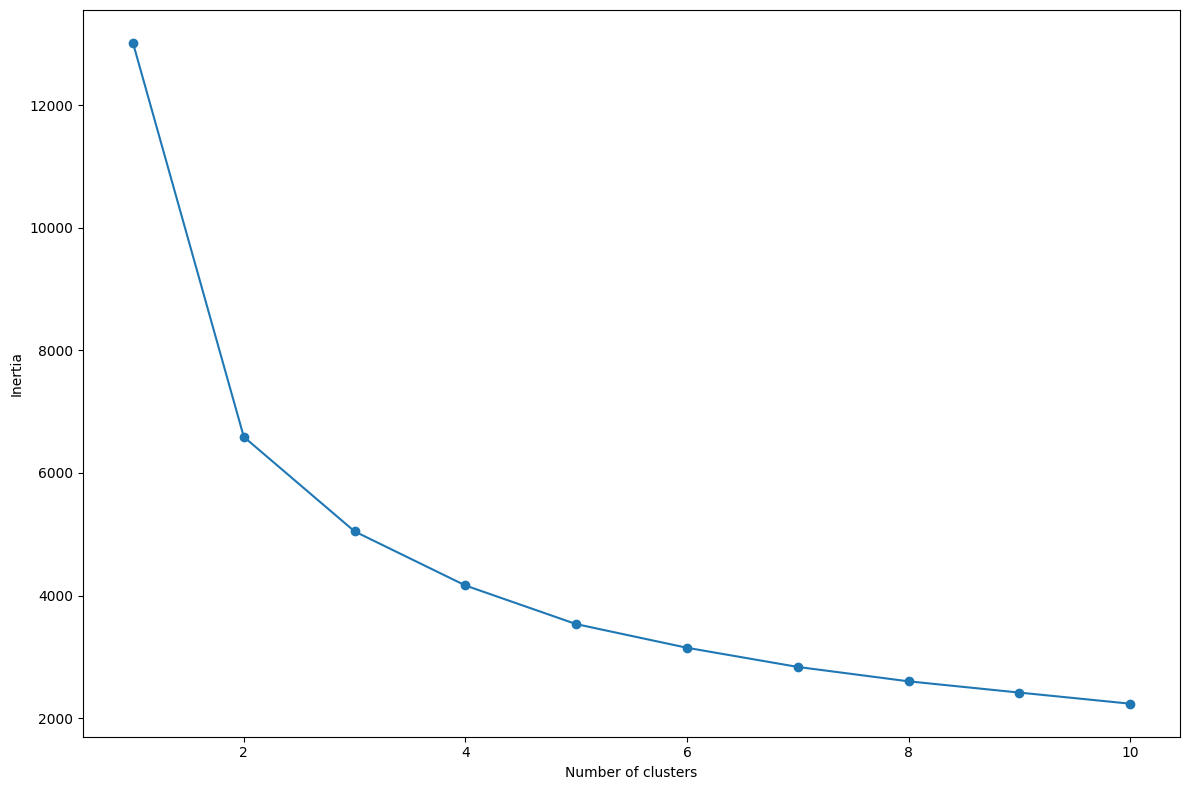

In [51]:
# Finding the best number of clusters based on the inertia value
inertiaValue = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='random',
                n_init=10, 
                max_iter=300,
                tol=0.0001,
                random_state=0)
    
    km.fit(RFM_Table_scaled)
    inertiaValue.append(km.inertia_)
    
plt.plot(range(1, 11), inertiaValue, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
#plt.savefig('elbow.png', dpi=300)
plt.show()

In [52]:
# Defining kmeans function to plot clusters
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels,  palette='Blues_d')
    
    return df_new

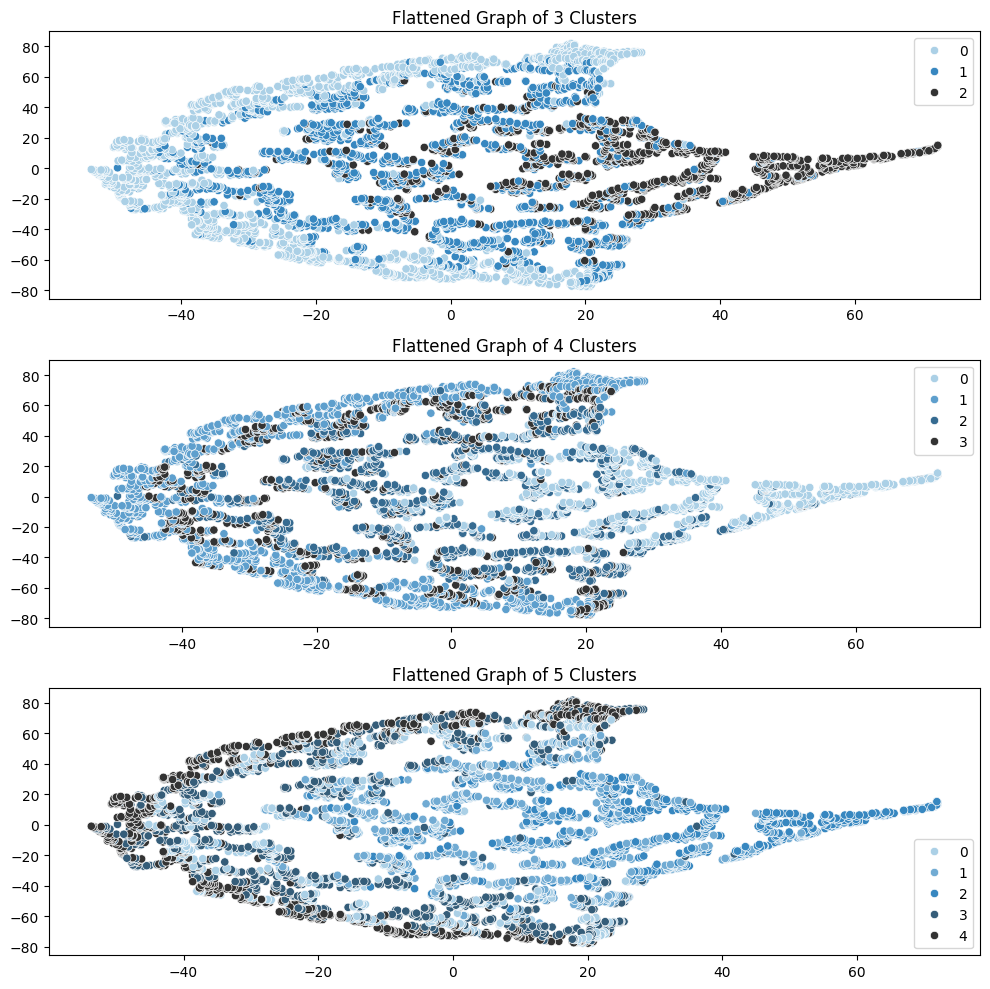

In [53]:
# Plotting different numbered clusters
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_scaled, 3,retail_rfm)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_scaled, 4, retail_rfm)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_scaled, 5, retail_rfm)

plt.tight_layout()


In [54]:
# Silhouette analysis
range_n_clusters = [3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(RFM_Table_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(RFM_Table_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=3, the silhouette score is 0.31165408067741934
For n_clusters=4, the silhouette score is 0.31447253657463764
For n_clusters=5, the silhouette score is 0.2815352016514346
For n_clusters=6, the silhouette score is 0.2819307797354574
For n_clusters=7, the silhouette score is 0.26563985587716515
For n_clusters=8, the silhouette score is 0.2639075167556583


Highest silhouette score for n=4 cluster

### Optimized Clustering

In [55]:
# Defining the K-Means object for best number of clusters. n=4 in this case
km = KMeans(n_clusters=4, 
            init='random',
             n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=3)

In [56]:
# Running the clustering algorithm on the data set
predictedCluster = km.fit_predict(RFM_Table_scaled)
print(predictedCluster)
print('Inertia:', km.inertia_)

[3 1 3 ... 0 1 3]
Inertia: 4163.692281188334


In [57]:
# Adding ClusterID Column to original RFM Table
segmented_rfm['PredictedClusterID']=predictedCluster
segmented_rfm.head(10)

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,Value Segment,RFM Customer Segments,PredictedClusterID
0,12346,325,1,77183.60,4,4,1,441,9,Mid-Value,Lost Customer,3
1,12347,1,182,4310.00,1,1,1,111,3,Low-Value,Best Customer,1
2,12348,74,31,1797.24,3,3,1,331,7,Mid-Value,Big Spender,3
3,12349,18,73,1757.55,2,2,1,221,5,Low-Value,Big Spender,3
4,12350,309,17,334.40,4,4,3,443,11,High-Value,Lost Customer,2
5,12352,35,85,2506.04,2,2,1,221,5,Low-Value,Big Spender,3
6,12353,203,4,89.00,4,4,4,444,12,High-Value,Lost Cheap Customer,2
7,12354,231,58,1079.40,4,2,2,422,8,Mid-Value,Average Customer,3
8,12355,213,13,459.40,4,4,3,443,11,High-Value,Lost Customer,2
9,12356,22,59,2811.43,2,2,1,221,5,Low-Value,Big Spender,3


<Axes: >

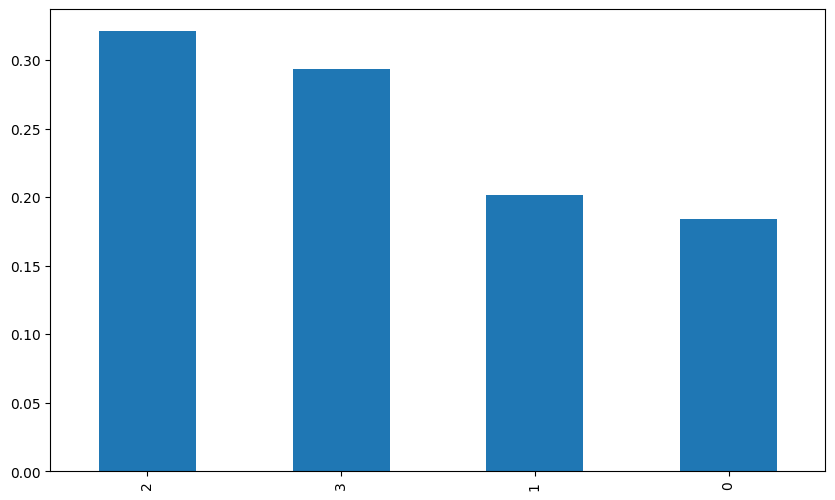

In [58]:
# Distribution og each Cluster
segmented_rfm['PredictedClusterID'].value_counts(normalize=True).plot(kind = 'bar',figsize = (10,6))

## Interpretation of Clustering

In [59]:
# Creating Treemap for each cluster with Customer segment
clustered_product_counts = segmented_rfm.groupby(['PredictedClusterID', 'RFM Customer Segments']).size().reset_index(name='Count')
clustered_product_counts = clustered_product_counts.sort_values('Count', ascending=False)

fig_treemap_clustered_product = px.treemap(clustered_product_counts, 
                                         path=['PredictedClusterID', 'RFM Customer Segments'], 
                                         values='Count',
                                         color='PredictedClusterID', color_continuous_scale = 'blues', 
                                         title='RFM Customer Segments by ClusterID', width = 1300, height = 900)
fig_treemap_clustered_product.show()

In [60]:
# Defining function to calculate average Recency, Frequency, Monetory for each Cluster
def rfm_values(df):

    df_new = df.groupby(['PredictedClusterID']).agg({
        'R_quartile': 'mean',
        'Recency': 'mean',
        'F_quartile': 'mean',
        'Frequency': 'mean',
        'M_quartile': 'mean',
        'Monetary': 'mean'
    }).round(0)
    
    return df_new

In [61]:
# Applying function
rfm_values(segmented_rfm)

,R_quartile,Recency,F_quartile,Frequency,M_quartile,Monetary
PredictedClusterID,,,,,,
0,1.0,19.0,3.0,36.0,3.0,791.0
1,1.0,12.0,1.0,281.0,1.0,6797.0
2,4.0,183.0,4.0,15.0,4.0,299.0
3,3.0,92.0,2.0,80.0,2.0,1502.0


Here are the interpretation of each cluster
* <b> Cluster0: </b> Most Recent customer with average frequency and monetary, mostly <b>"Look out buyers"</b>.
* <b> Cluster1: </b> <b>"Best Customers"</b> with recent puchases, most frequent buyers with higher monetary investment
* <b> Cluster2: </b> <b>"Lost Cheap Customer"</b> with last purchase long ago, purchased very few times with little spend
* <b> Cluster3: </b> <b>"Almost Lost Customer"</b> , who haven’t purchased for some time(R=3), but used to purchase frequently and spent a lot

## Recommendation
Here are some recommanded strategy for each clusters for optimized business
* <b>Cluster0</b>: For Lookout Buyers, engage with personalized offers or discounts to incentivize more frequent purchases and foster loyalty
* <b>Cluster1</b>: For Best Customers, provide exclusive perks, loyalty rewards, or VIP treatment to enhance their satisfaction and encourage repeat purchases
* <b>Cluster2</b>: For Lost Cheap Customers, Explore opportunities to upsell or cross-sell higher-value products/services and re-establish value to potentially regain their patronage.
* <b>Cluster3</b>: For Almost Lost Customers, re-engage through targeted marketing campaigns, special promotions, or personalized communication to win back their interest and loyalty.










## Conclusion
Customer segmentation is a useful tool for firms to better match their strategy and tactics with their present and prospective consumers. 
Every consumer is unique, as is their journey, therefore a single technique will seldom work for everyone.Customer segmentation groups might spark talks about creating marketing or product personas. This is because good consumer segmentation analysis is commonly utilized to inform. 
Understanding a brand's messaging and positioning may guide investments in new products and services, as well as identify opportunities to enhance sales. As a result, marketing personas must be tightly matched with those groups to be effective.

